In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [4]:
df.shape

(7728394, 46)

In [5]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [6]:
df.fillna(0,inplace=True)

In [7]:
df.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
S

In [9]:
print("Number of columns: ",len(df.columns))
print("Number of rows: ",len(df))

Number of columns:  46
Number of rows:  7728394


In [10]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
df.drop('End_Lat', axis=1, inplace=True)
df.drop('End_Lng', axis=1, inplace=True)
df.drop('Country', axis=1, inplace=True)

In [12]:
df.head()

ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  Distance(mi)  \
0  39.865147 -84.058723          0.01   
1  39.928059 -82.831184          0.01   
2  39.063148 -84.032608          0.01   
3  39.747753 -84.205582          0.01   
4  39.627781 -84.188354          0.01   

                                         Description  \
0  Right lane blocked due to accident on I-70 Eas...   
1  Accident on Brice Rd at Tussing Rd. Expect del...   
2  Accident on OH-32 State Route 32 Westbound at ...   
3  Accident on I-75 Southbound at Exits 52 52B US...   
4  Accident on McEwen Rd at OH-725 Miamisburg Cen...   

                      Street  ... Roundabout Station   Stop Traffic_Calming  \
0                     I-70 E  ...      False   False  False           False   
1                   Brice Rd  ...      False   False  False           False   
2             State Route 32  ...      False   False  False           False   
3                     I-75 S  ...      False   False  False           False   
4  Miamisburg Centerville Rd  ...      False   False  False           False   

  Traffic_Signal Turning_Loop Sunrise_Sunset  Civil_Twilight  \
0          False        False          Night           Night   
1          False        False          Night           Night   
2           True        False          Night           Night   
3          False        False          Night             Day   
4           True        False            Day             Day   

   Nautical_Twilight  Astronomical_Twilight  
0              Night                  Night  
1              Night                    Day  
2                Day                    Day  
3                Day                    Day  
4                Day                    Day  

[5 rows x 43 columns]

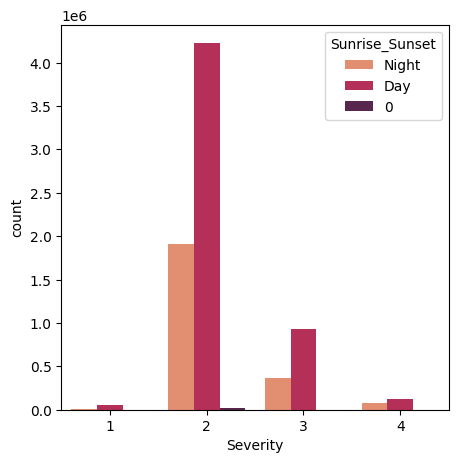

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x='Severity', data=df, hue='Sunrise_Sunset', palette='rocket_r')
plt.show()

In [67]:
# Group the data and count severity for each county
haha = df.groupby('County')['Severity'].value_counts()

# Reset the index to make 'County' and 'Severity' regular columns
haha = haha.reset_index(name='Count')

# Create the barplot using the modified data
plt.figure(figsize=(100,100))  # Adjust figure size as needed
sns.barplot(x='County', y='Count', data=haha, hue='Severity',palette='rocket_r')

plt.xlabel('County')
plt.ylabel('Accident Count')
plt.title('Accident Count Based on County')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

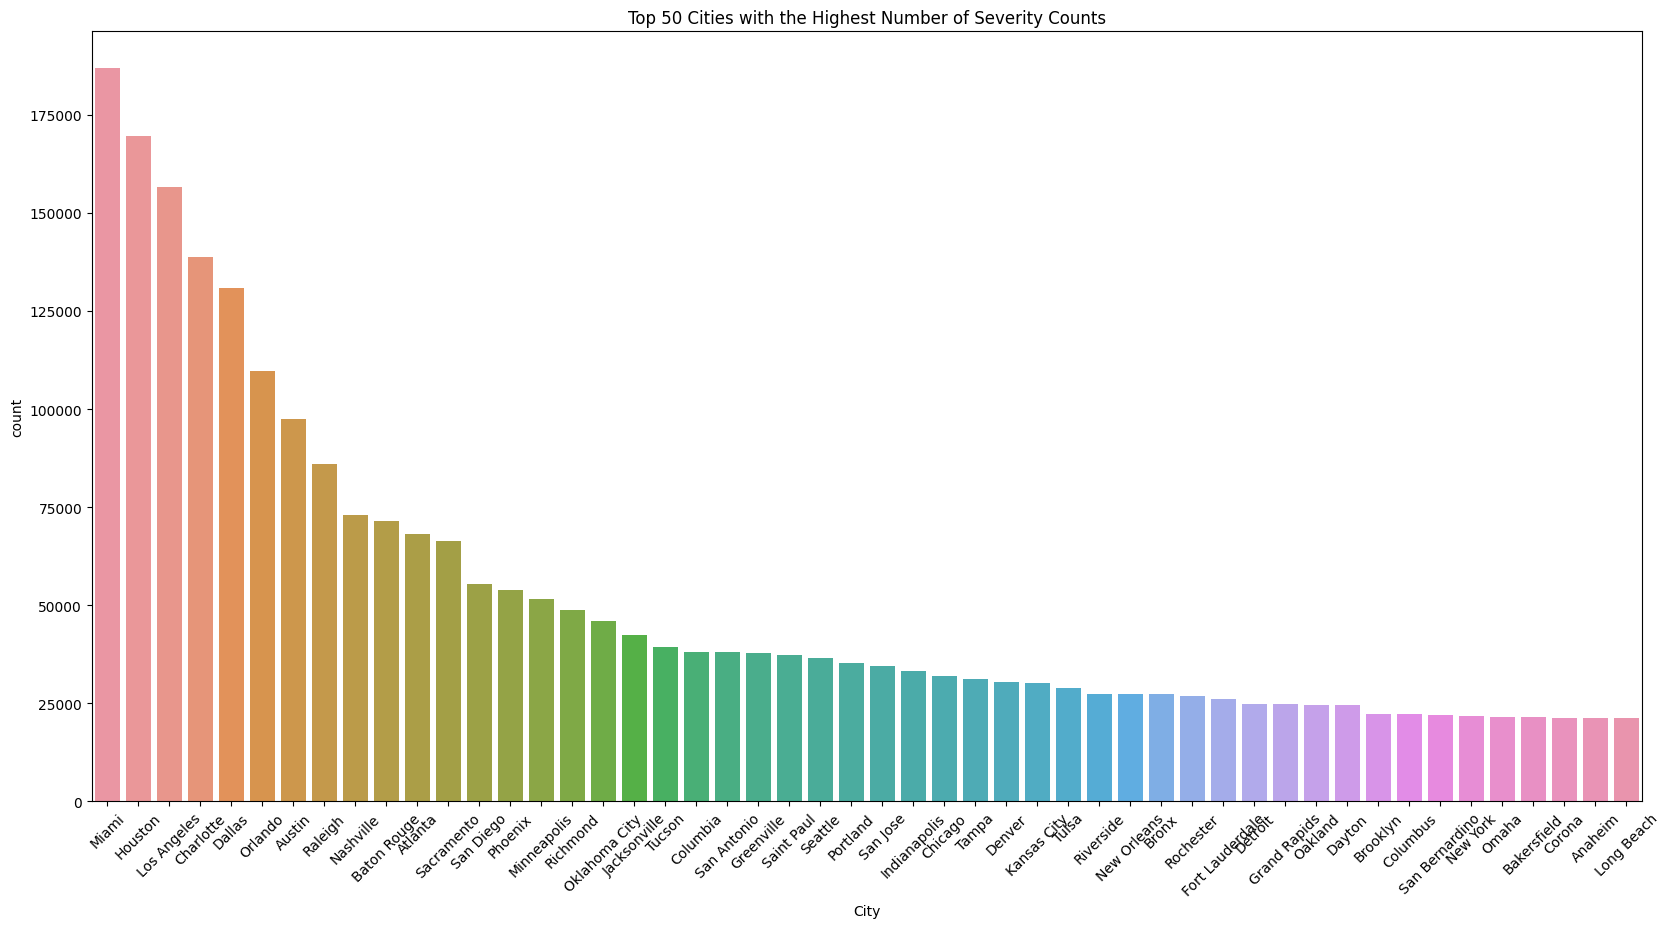

In [22]:
severity_counts = df.groupby(['City', 'Severity']).size().reset_index(name='Counts')

# Step 2: Group by 'City' and sum the counts to get the total severity counts per city
total_severity_counts = severity_counts.groupby('City')['Counts'].sum().reset_index()

# Step 3: Sort the cities by total severity counts in descending order and select the top 50
top_50_cities = total_severity_counts.nlargest(50, 'Counts')

# Step 4: Merge back to get the counts of each severity for the top 50 cities
top_50_cities_severity = severity_counts[severity_counts['City'].isin(top_50_cities['City'])]

# Ensure cities are in the correct order for plotting
ordered_cities = top_50_cities.sort_values(by='Counts', ascending=False)['City']

# Step 5: Create the countplot
plt.figure(figsize=(20, 10))
sns.countplot(data=df[df['City'].isin(ordered_cities)], x='City', order=ordered_cities)
plt.title('Top 50 Cities with the Highest Number of Severity Counts')
plt.xticks(rotation=45)
plt.show()

In [23]:
df['Start_Lat'].unique()

array([39.865147, 39.928059, 39.063148, ..., 34.120911, 33.943599,
       34.239104])

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

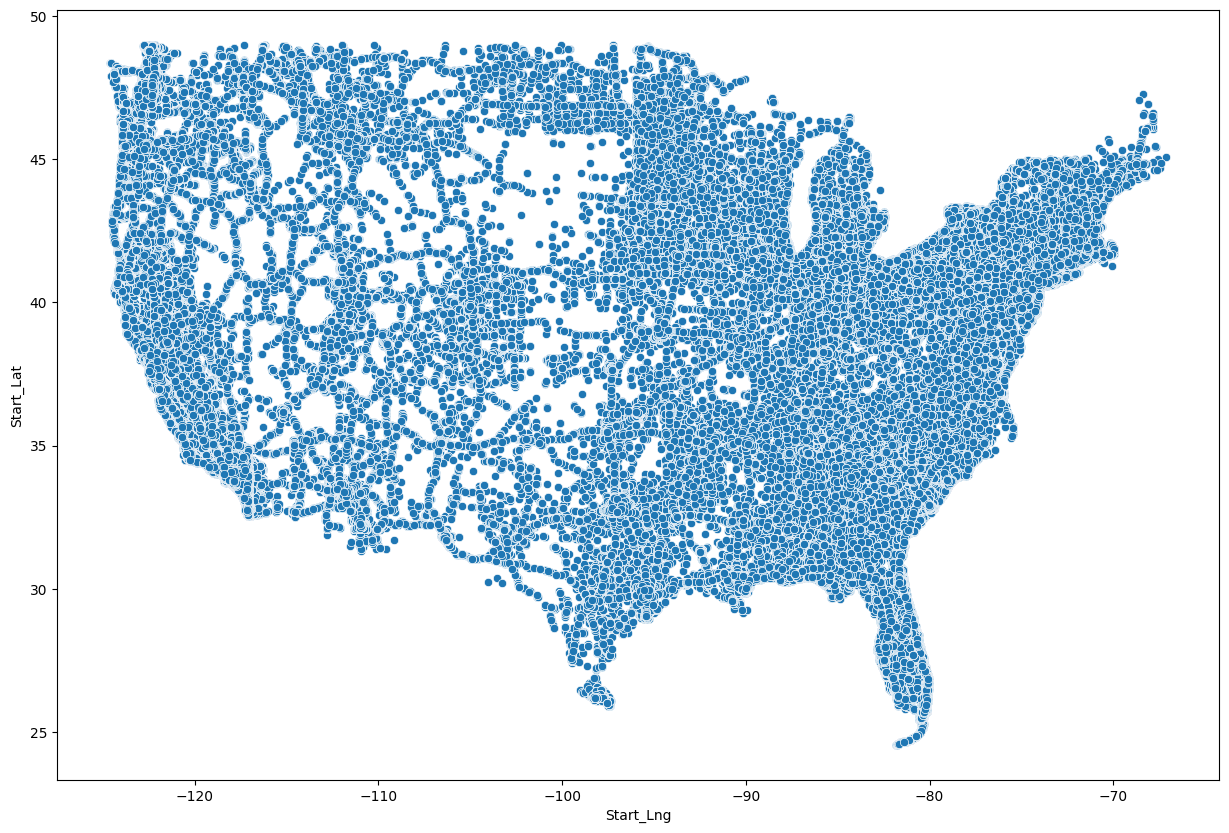

In [26]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=df.Start_Lat, x=df.Start_Lng)

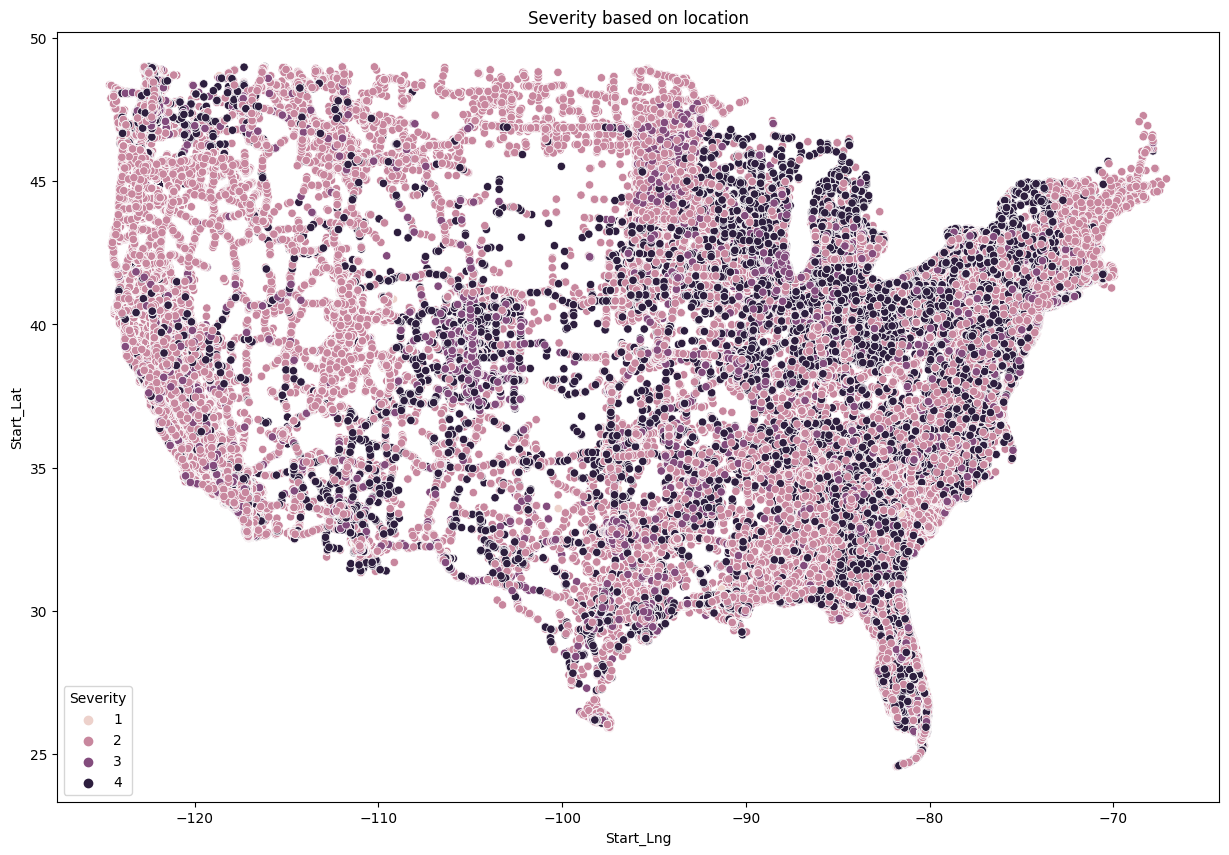

In [81]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='Start_Lng', y='Start_Lat', hue='Severity')
plt.title('Severity based on location')
plt.show()

In [41]:
weather=df['Weather_Condition'].value_counts()
weather

Weather_Condition
Fair                           2560802
Mostly Cloudy                  1016195
Cloudy                          817082
Clear                           808743
Partly Cloudy                   698972
                                ...   
Sand / Windy                         1
Heavy Rain Shower / Windy            1
Blowing Snow Nearby                  1
Heavy Freezing Rain / Windy          1
Drifting Snow                        1
Name: count, Length: 145, dtype: int64

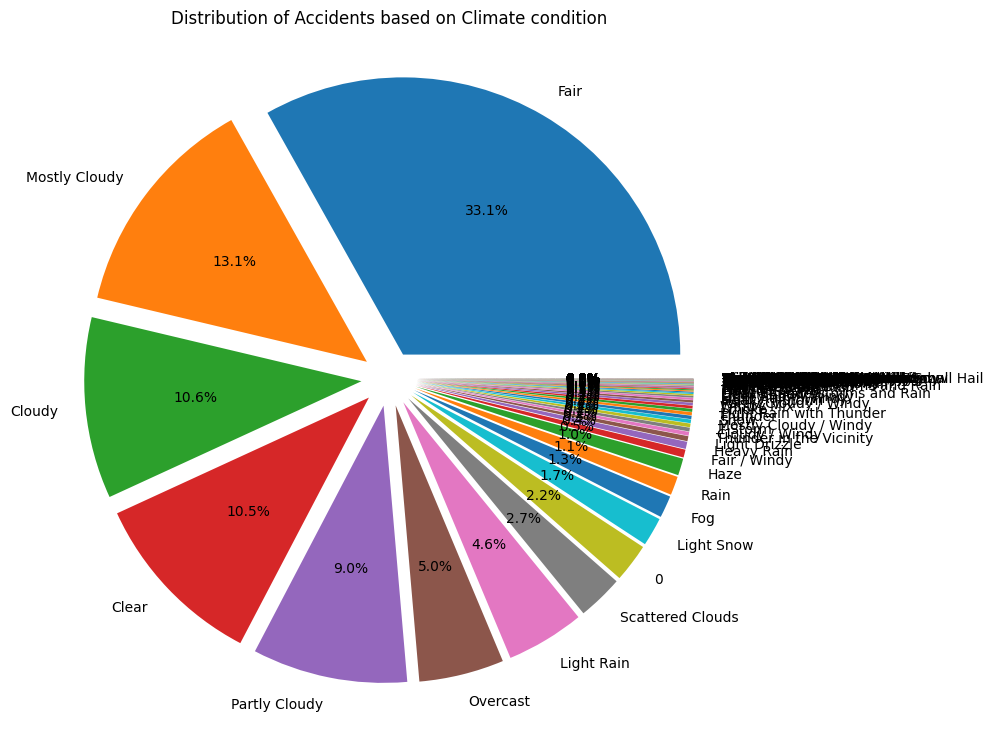

In [74]:
plt.figure(figsize=(9,9))
plt.title('Distribution of Accidents based on Climate condition')
label = weather.keys()
ex=[0.1]*len(weather)
plt.pie(weather, autopct='%.1f%%', labels=label, explode=ex)
plt.show()

In [48]:
df['Sunrise_Sunset'].unique()

array(['Night', 'Day', 0], dtype=object)

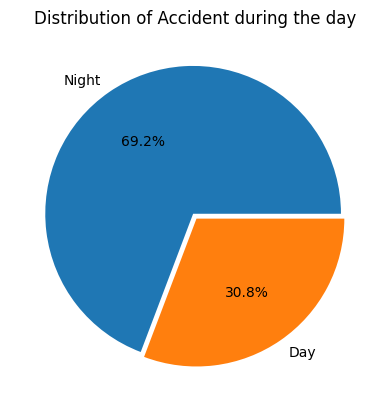

In [49]:
plt.title('Distribution of Accident during the day')
df.drop(df[df['Sunrise_Sunset']==0].index, inplace=True)
plt.pie(df['Sunrise_Sunset'].value_counts(), autopct='%.1f%%', explode=[0.02,0.02], labels=['Night', 'Day'])
plt.show()

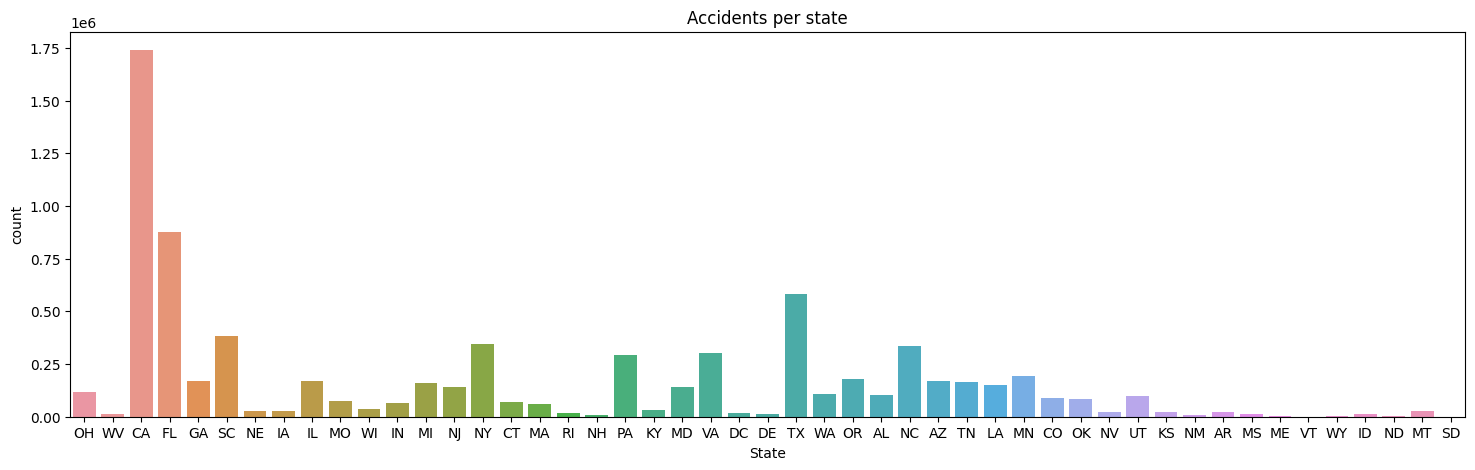

In [51]:
plt.figure(figsize=(18,5))
plt.title('Accidents per state')
sns.countplot(x='State', data=df)
plt.show()

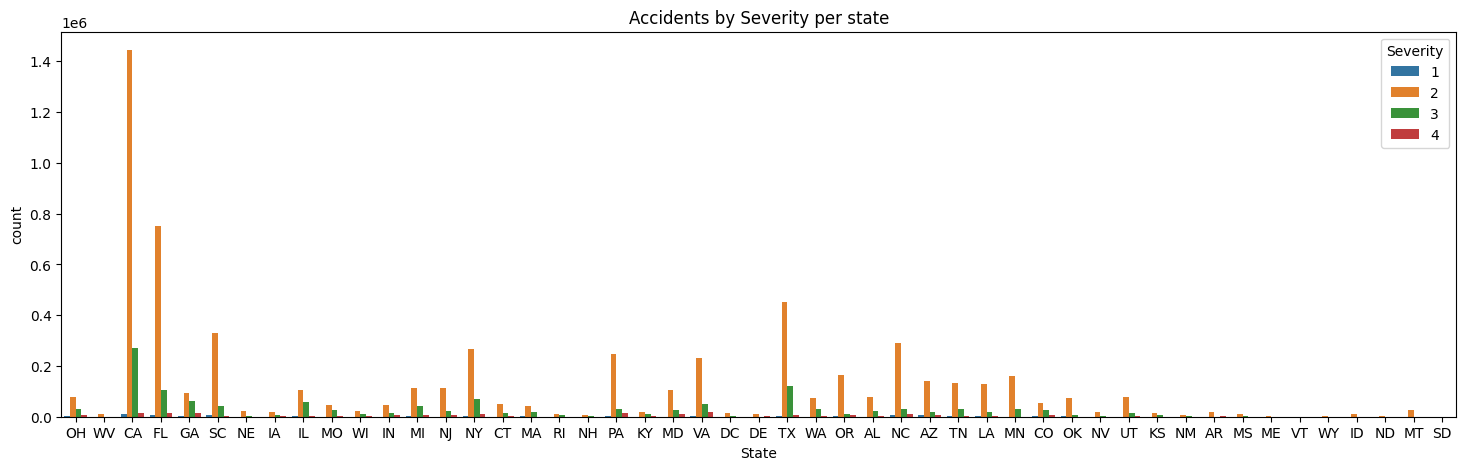

In [56]:
plt.figure(figsize=(18,5))
plt.title('Accidents by Severity per state')
sns.countplot(x='State', data=df, hue='Severity')
plt.show()

In [76]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='mixed')
df['Resolution_Time'] = (df['End_Time'] - df['Start_Time'])/pd.Timedelta(hours=1)
df['Resolution_Time']

0          5.233333
1          0.500000
2          0.500000
3          0.500000
4          0.500000
             ...   
7728389    0.476667
7728390    0.448056
7728391    0.474444
7728392    0.489167
7728393    0.490278
Name: Resolution_Time, Length: 7705148, dtype: float64

In [82]:
resolution_time_severity= df.groupby('Severity')['Resolution_Time'].mean()
resolution_time_severity

Severity
1     0.896726
2     7.938548
3     1.247055
4    27.534859
Name: Resolution_Time, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


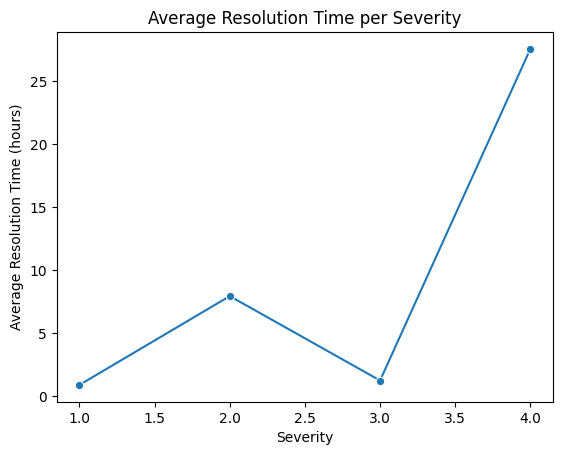

In [83]:
sns.lineplot(resolution_time_severity, marker='o')
plt.title('Average Resolution Time per Severity')
plt.xlabel('Severity')
plt.ylabel('Average Resolution Time (hours)')
plt.show()

In [84]:
df['Start_Time']

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7705148, dtype: datetime64[ns]

In [85]:
year=df['Start_Time'].dt.year

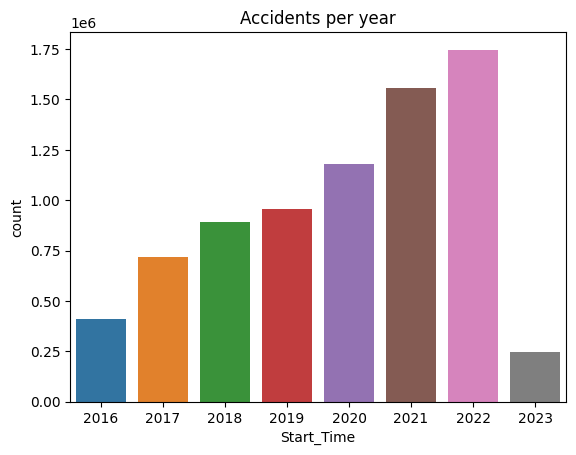

In [86]:
sns.countplot(x=year, data=df)
plt.title('Accidents per year')
plt.show()

Text(0.5, 1.0, 'Severity based on Traffic_Calming')

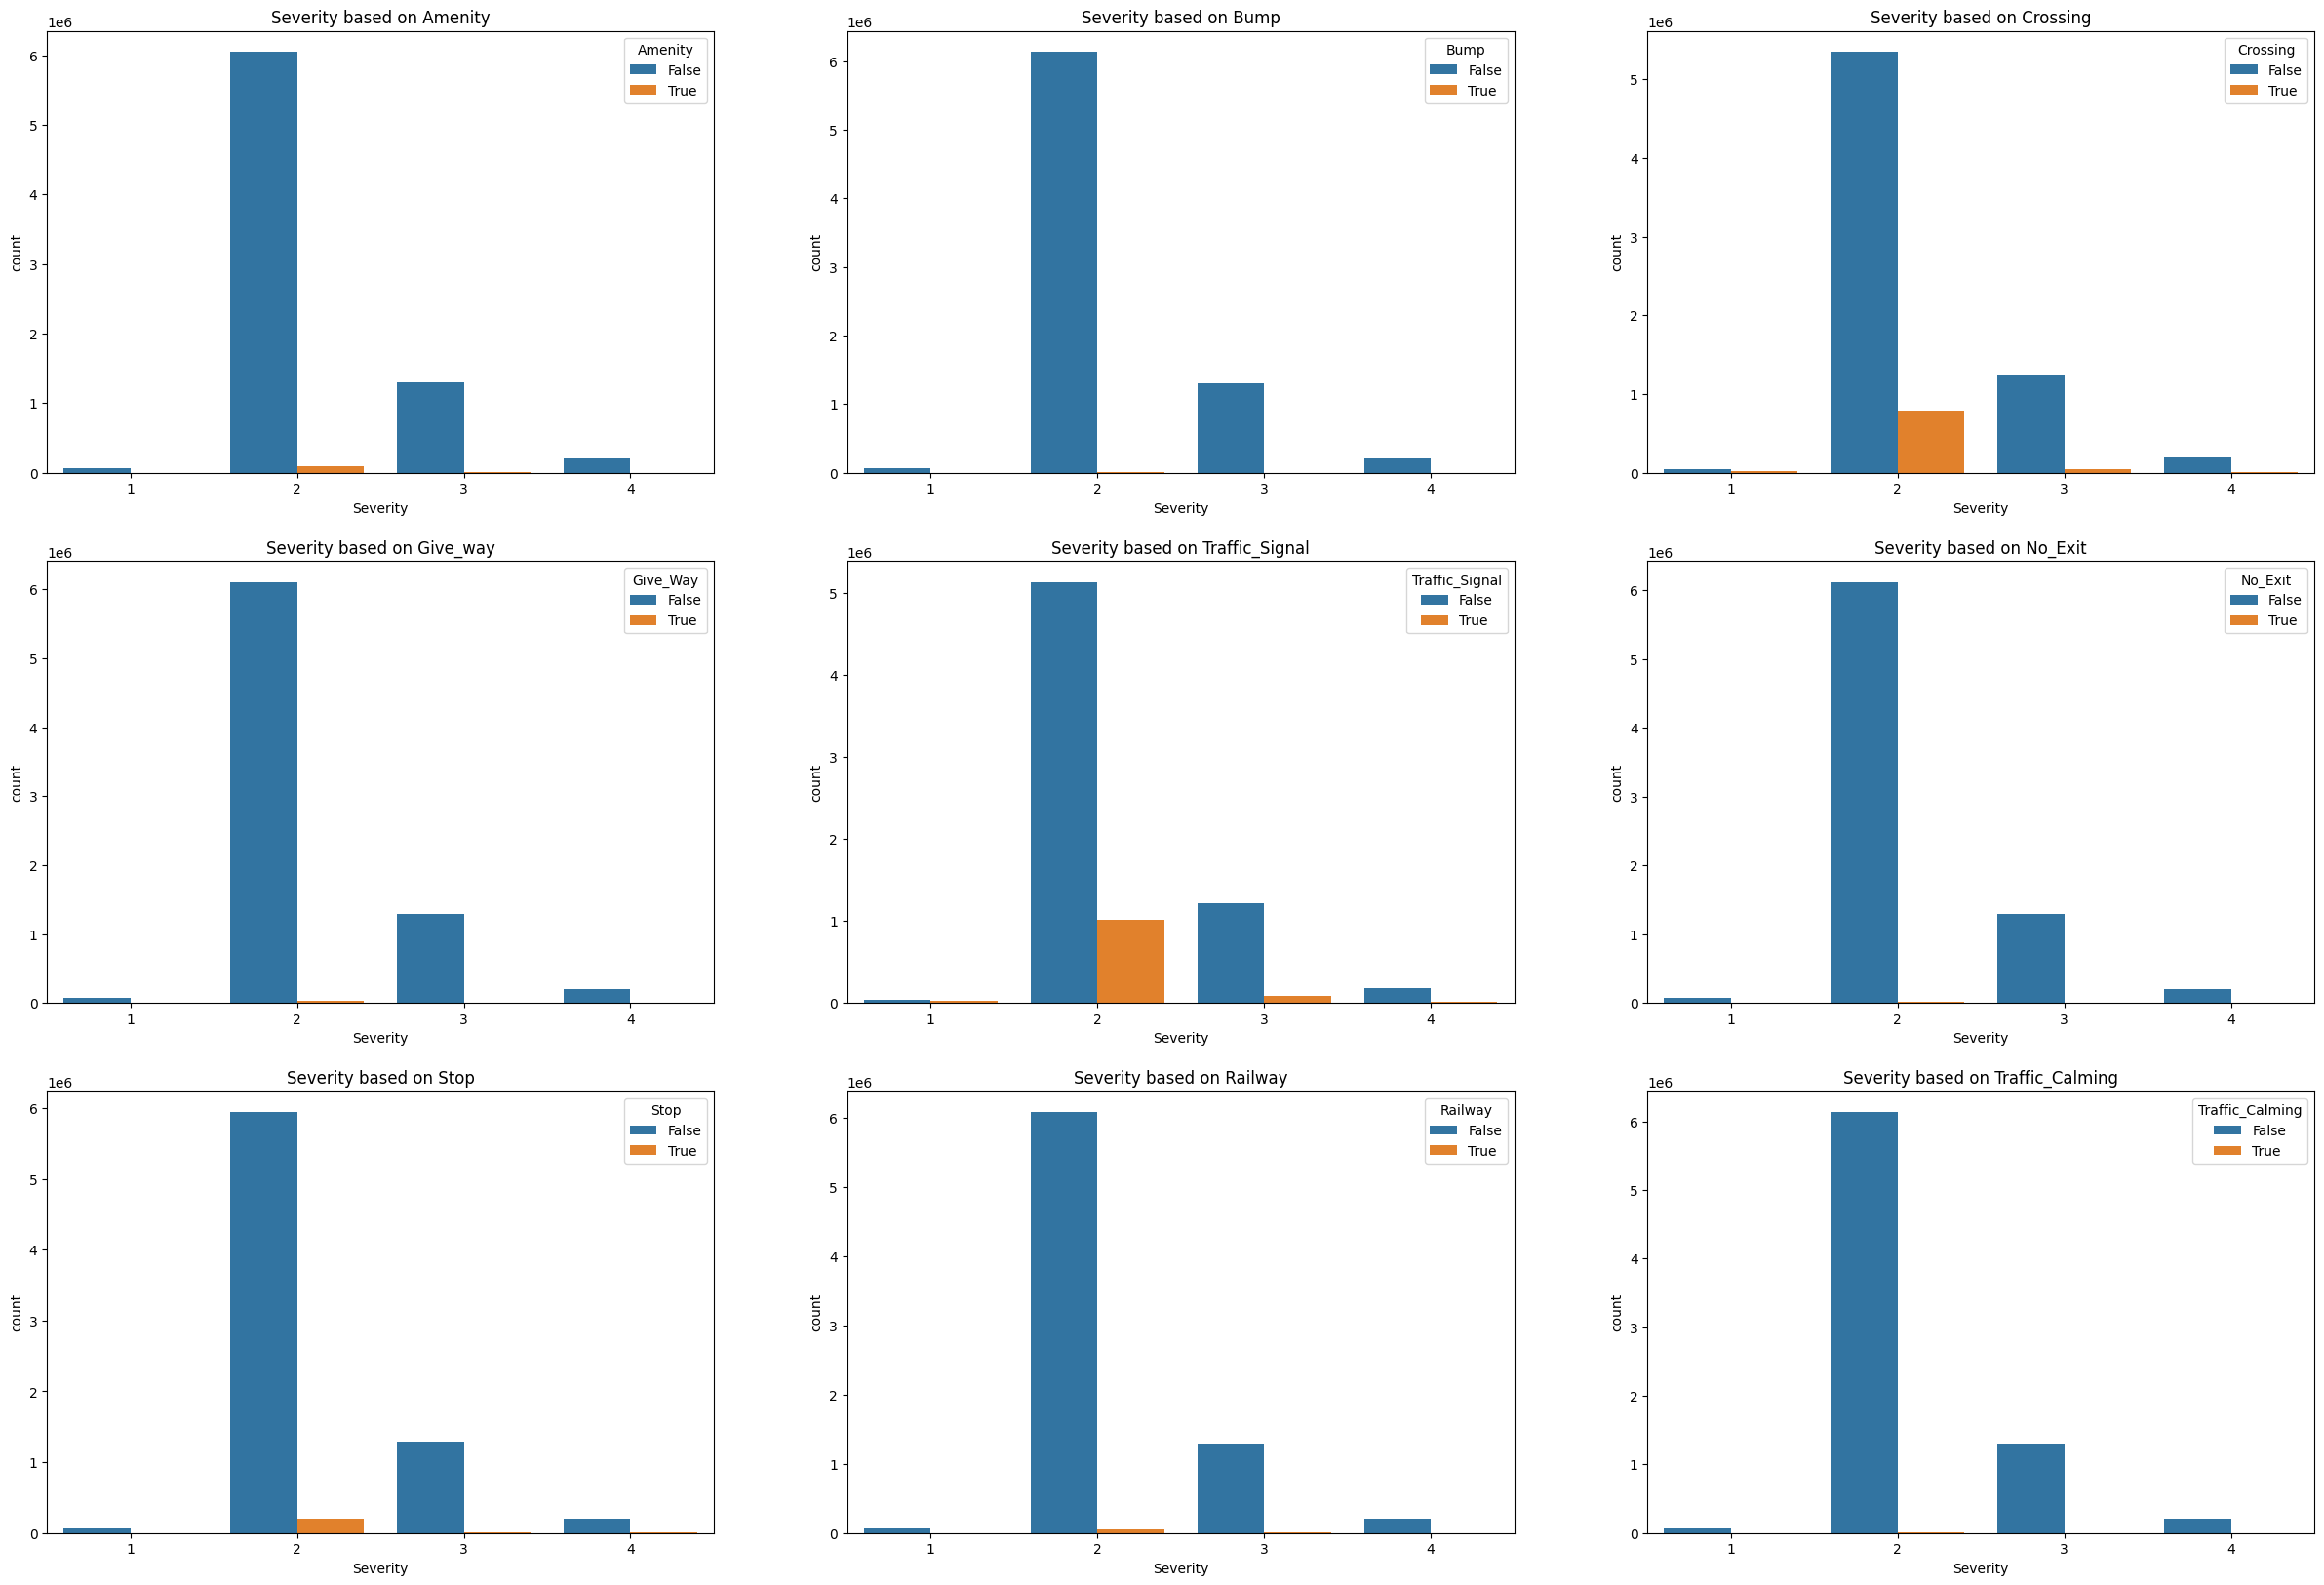

In [87]:
plt.figure(figsize=(30,20))
plt.subplot(3,3,1)
sns.countplot(x='Severity', data=df, hue='Amenity')
plt.title('Severity based on Amenity')
plt.subplot(3,3,2)
sns.countplot(x='Severity', data=df, hue='Bump')
plt.title('Severity based on Bump')
plt.subplot(3,3,3)
sns.countplot(x='Severity', data=df, hue='Crossing')
plt.title('Severity based on Crossing')
plt.subplot(3,3,4)
sns.countplot(x='Severity', data=df, hue='Give_Way')
plt.title('Severity based on Give_way')
plt.subplot(3,3,5)
sns.countplot(x='Severity', data=df, hue='Traffic_Signal')
plt.title('Severity based on Traffic_Signal')
plt.subplot(3,3,6)
sns.countplot(x='Severity', data=df, hue='No_Exit')
plt.title('Severity based on No_Exit')
plt.subplot(3,3,7)
sns.countplot(x='Severity', data=df, hue='Stop')
plt.title('Severity based on Stop')
plt.subplot(3,3,8)
sns.countplot(x='Severity', data=df, hue='Railway')
plt.title('Severity based on Railway')
plt.subplot(3,3,9)
sns.countplot(x='Severity', data=df, hue='Traffic_Calming')
plt.title('Severity based on Traffic_Calming')

In [89]:
top_50_cities = df['City'].value_counts().head(50)
top_50_cities

City
Miami              186916
Houston            169604
Los Angeles        156491
Charlotte          138652
Dallas             130939
Orlando            109733
Austin              97359
Raleigh             86079
Nashville           72930
Baton Rouge         71588
Atlanta             68184
Sacramento          66264
San Diego           55504
Phoenix             53974
Minneapolis         51488
Richmond            48845
Oklahoma City       46092
Jacksonville        42447
Tucson              39304
Columbia            38176
San Antonio         37961
Greenville          37802
Saint Paul          37383
Seattle             36564
Portland            35383
San Jose            34536
Indianapolis        33219
Chicago             32035
Tampa               31193
Denver              30557
Kansas City         30107
Tulsa               28880
Riverside           27403
New Orleans         27354
Bronx               27297
Rochester           26865
Fort Lauderdale     26205
Detroit             24863
Grand R

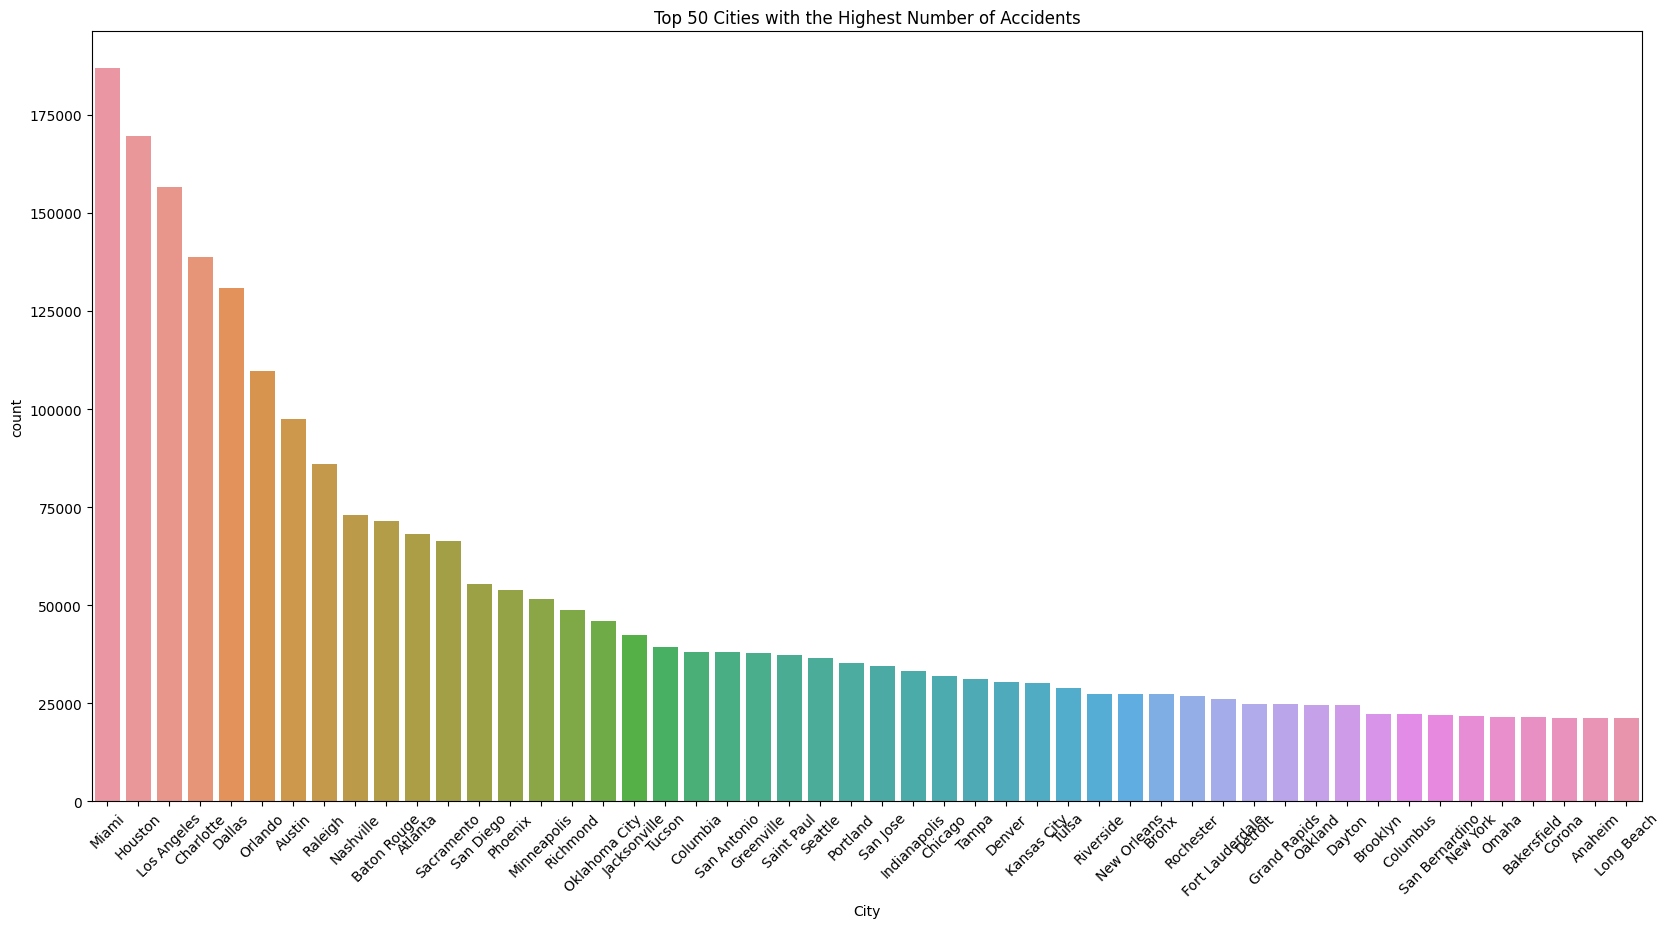

In [90]:
plt.figure(figsize=(20, 10))
sns.countplot(x='City', data=df, order=top_50_cities.index)
plt.title('Top 50 Cities with the Highest Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [91]:
top_50_states = df['State'].value_counts().head()
top_50_states

State
CA    1740090
FL     875602
TX     582394
SC     381585
NY     347250
Name: count, dtype: int64

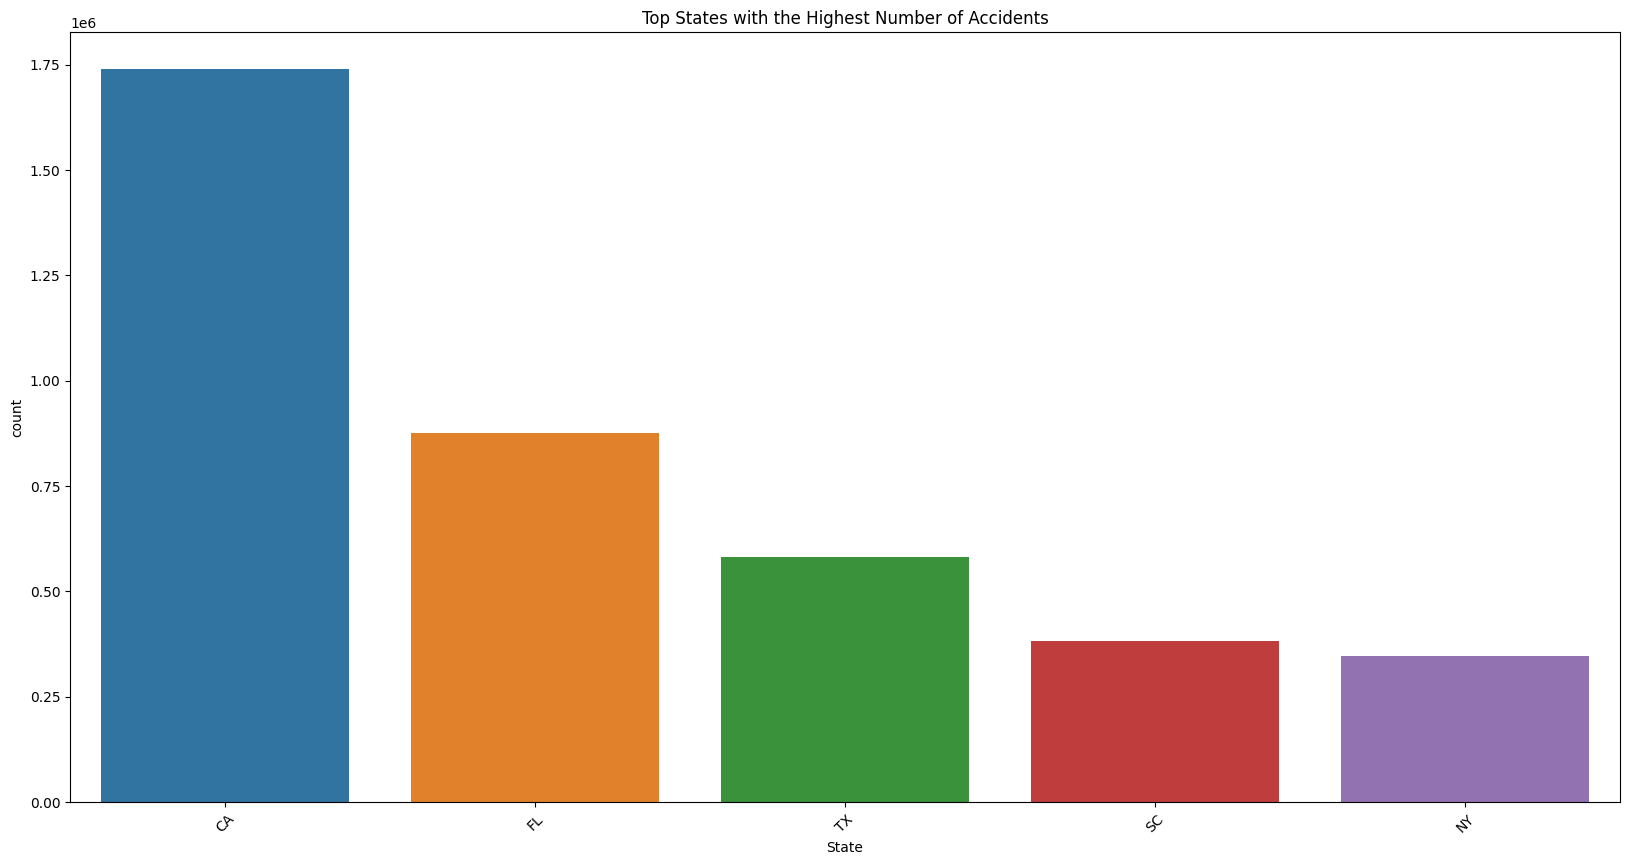

In [92]:
plt.figure(figsize=(20, 10))
sns.countplot(x='State', data=df, order=top_50_states.index)
plt.title('Top States with the Highest Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [93]:
value_severity_1=df[df.Severity==1].State.value_counts()
value_severity_2=df[df.Severity==2].State.value_counts()
value_severity_3=df[df.Severity==3].State.value_counts()
value_severity_4=df[df.Severity==4].State.value_counts()
value_severity_1
value_severity_2
value_severity_3
value_severity_4

State
VA    18071
PA    15676
CA    13498
FL    13098
GA    12732
MD    10846
NY    10652
NC    10188
MI     7592
CO     7451
TX     7061
OH     6420
OR     5894
NJ     5857
IN     5510
AZ     5093
IL     4284
CT     4153
WA     4077
TN     3449
WI     3418
SC     3086
MO     2611
AR     2590
IA     2002
LA     1922
AL     1819
UT     1644
DE     1541
KY     1204
MN      859
MS      825
DC      815
WV      792
KS      719
NV      717
NM      560
MA      547
ID      541
WY      527
NE      521
OK      485
MT      449
NH      252
RI      119
ME      119
VT       88
SD       45
ND       17
Name: count, dtype: int64

Text(0.5, 1.0, 'Most Severe Accidents: Severity=4')

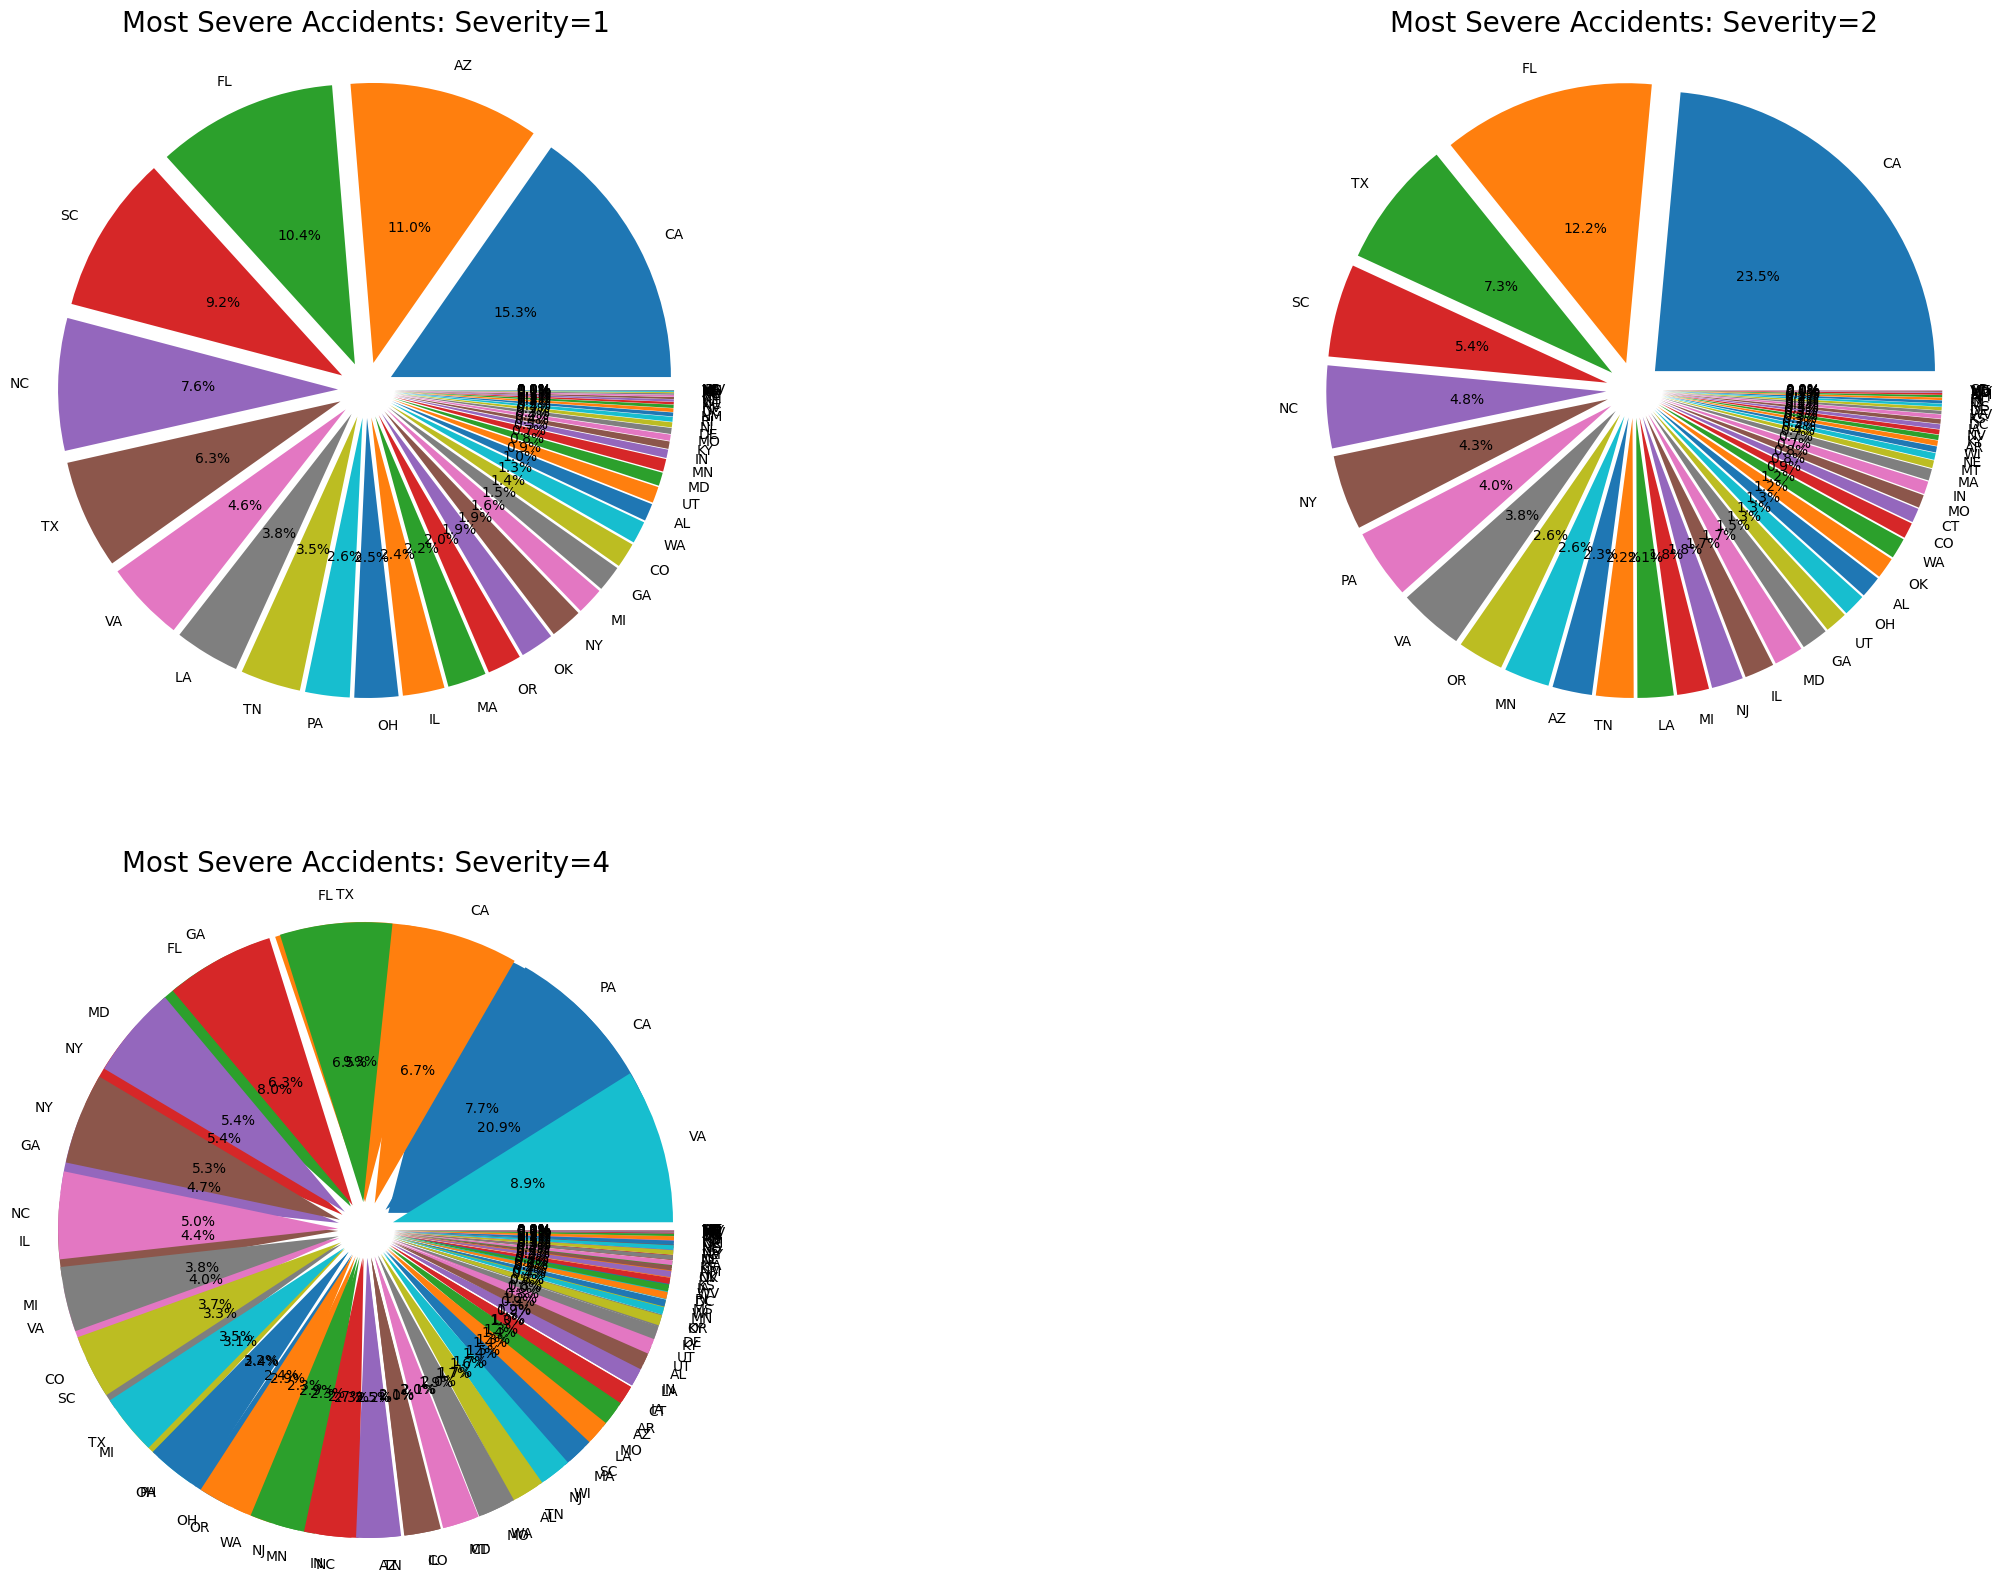

In [94]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
plt.pie(x=value_severity_1, autopct='%.1f%%', explode=[0.1]*len(value_severity_1), labels=value_severity_1.keys(), pctdistance=0.5)
plt.title('Most Severe Accidents: Severity=1', fontsize=20)
plt.subplot(2,2,2)
plt.pie(x=value_severity_2, autopct='%.1f%%', explode=[0.1]*len(value_severity_2), labels=value_severity_2.keys(), pctdistance=0.5)
plt.title('Most Severe Accidents: Severity=2', fontsize=20)
plt.subplot(2,2,3)
plt.pie(x=value_severity_3, autopct='%.1f%%', explode=[0.1]*len(value_severity_3), labels=value_severity_3.keys(), pctdistance=0.5)
plt.title('Most Severe Accidents: Severity=3', fontsize=20)
plt.subplot(2,2,3)
plt.pie(x=value_severity_4, autopct='%.1f%%', explode=[0.1]*len(value_severity_4), labels=value_severity_4.keys(), pctdistance=0.5)
plt.title('Most Severe Accidents: Severity=4', fontsize=20)

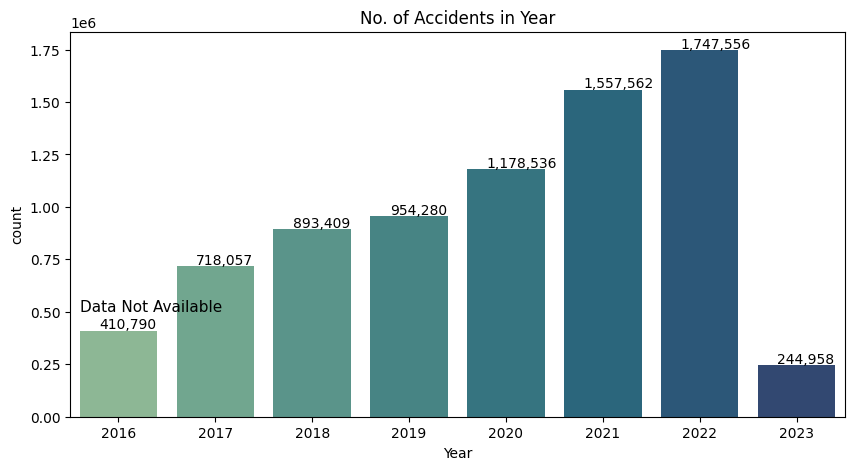

In [96]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time[0]


df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday
#yearly data subset
data_2016 = df[df.Start_Time.dt.year == 2016]
data_2017 = df[df.Start_Time.dt.year == 2017]
data_2018 = df[df.Start_Time.dt.year == 2018]
data_2019 = df[df.Start_Time.dt.year == 2019]
data_2020 = df[df.Start_Time.dt.year == 2020]
data_2017_2019 = df[(df["Year"] >= 2017) & (df["Year"] <= 2019)]
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Year", data=df, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(-0.4,500000), fontsize=11)
c.set_title("No. of Accidents in Year")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+10000
    ax.annotate(count, (x, y))
plt.show()